<a href="https://colab.research.google.com/github/808hanronald/808hanronald/blob/main/Project_Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Ronald Han

## Project Overview

  - ​The first part will involve creating a GitHub repository specifically for this project. You will also create a Colab Notebook with headers for each of the steps in the project. You will return to this notebook each week and will continue to update the repository as you make changes and additions to the project.  

  -We will continue to work off of the GitHub repository you created last week for your first portfolio project. The goal of your portfolio projects are to have items to show potential employers that demonstrate your data science skills and competencies.

  - The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

  - For Part 2, your task is to use Pandas to load in the data and start exploring and cleaning it. As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

  We will continue to work on your sales prediction project. The goal of this is to help you understand the data as it relates to the products and outlets that play crucial roles in increasing sales.

  - For Part 3, your task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:

    - Histograms to view the distributions of numerical features in your dataset.
    - Boxplots to view statistical summaries of numerical features in your dataset.
    - Countplots to view the frequency of each class of categorial features in your dataset.
    - Heatmap to view the correlation between features.

Start updating the README file associated with the project.

    - Add text describing the project.
    
    - Select two key visuals of different types that demonstrate a relevant insight into the data. Add text with a brief (1 sentence is sufficient) interpretation of the visuals you include.

Please feel free to add more than the minimum. Remember, this is your chance to display your skills!​

Commit your work to GitHub.

Turn in a link to your GitHub repo! We will continue to work on the project a little bit each week.

## Load and Inspect Data

In [1]:
import pandas as pd
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'

In [2]:
df = pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


1) How many rows and columns?
  - Rows: 8523
  - Columns: 12

2) What are the datatypes of each variable?
  - object(7), float(4) and int(!)

## Clean Data

3) Are there duplicates? If so, drop any duplicates.

In [5]:
df.duplicated().sum()


0

4) Identify missing values.

In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

  - Item_Weight: 1463
  - Outlet_Size: 2410

5) Address the missing values by using a placeholder value

In [7]:
df['Item_Weight'] = df['Item_Weight'].fillna(-1)
df['Item_Weight'].isna().sum()

0

In [8]:
df['Outlet_Size'].dtype
df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')
df['Outlet_Size'].isna().sum()

0

6) Confirm that there are no missing values after addressing them.

In [9]:
df.isna().sum().sum()

0

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [10]:
str_col = df.select_dtypes('object').columns
str_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [11]:
for col in str_col:
  print(f'Value count for {col}')
  print(df[col].value_counts())
  print("\n")

Value count for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value count for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value count for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value count for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT0

In [12]:
#df['Item_Fat_Content'].replace ({'reg' : 'Regular', 'LF' : 'Low Fat', 'low fat' : 'Low Fat'}= implace=True)
df['Item_Fat_Content'].replace({'reg': 'Regular', 'LF': 'Low Fat', 'low fat': 'Low Fat'}, inplace = True)
#df['Item_Fat_Content'] = df['Item_Fat_Content'].replace = ({'reg': 'Regular' })
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [13]:
num_col = df.select_dtypes('float', 'int').columns
num_col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [14]:
df.describe(include="number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
#fpath_out ='/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_clean_2023.csv'
#df.to_csv(fpath_out, index=False)


  - For Part 3, your task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:

  - Histograms to view the distributions of numerical features in your dataset.
- Boxplots to view statistical summaries of numerical features in your dataset.
  - Countplots to view the frequency of each class of categorial features in your dataset.
  - Heatmap to view the correlation between features.

Start updating the README file associated with the project.

Add text describing the project.

  - Select two key visuals of different types that demonstrate a relevant insight into the data.
  - Add text with a brief (1 sentence is sufficient) interpretation of the visuals you include.

## Exploratory Data Anaylist



In [16]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

  -Histogram

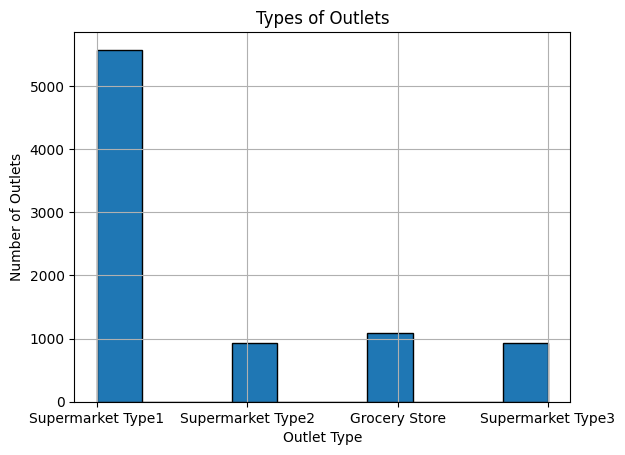

In [58]:
ax = df['Outlet_Type'].hist(edgecolor='black')
ax.set_title('Types of Outlets')
ax.set_xlabel('Outlet Type')
ax.set_ylabel('Number of Outlets');

  -Boxplot

In [19]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [20]:
df.describe(include=object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,2,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,2793,3350,5577


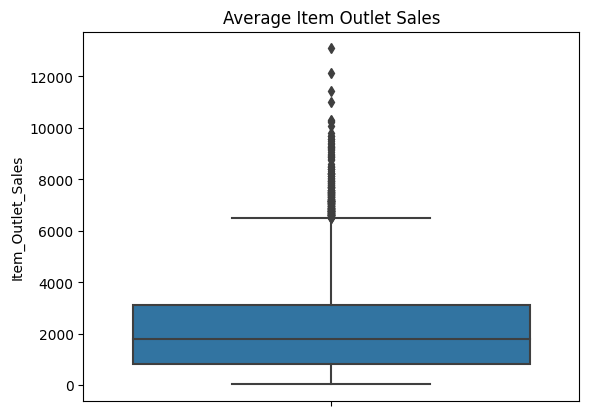

In [57]:
ax1= sns.boxplot(data=df, y='Item_Outlet_Sales')
ax1.set_title('Average Item Outlet Sales');

  - Countplots

In [36]:
val_counts = df['Item_Type'].value_counts()
val_counts.head()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Name: Item_Type, dtype: int64

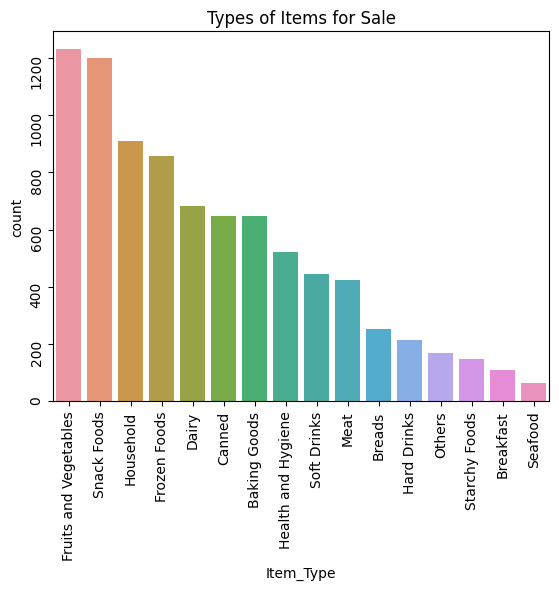

In [40]:
ax2 = sns.countplot(data=df, x= 'Item_Type',order=val_counts.index)
ax2.tick_params(rotation = 90)
ax2.set_title('Types of Items for Sale');

  - Heatmap

In [41]:
corr=df.corr(numeric_only=True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


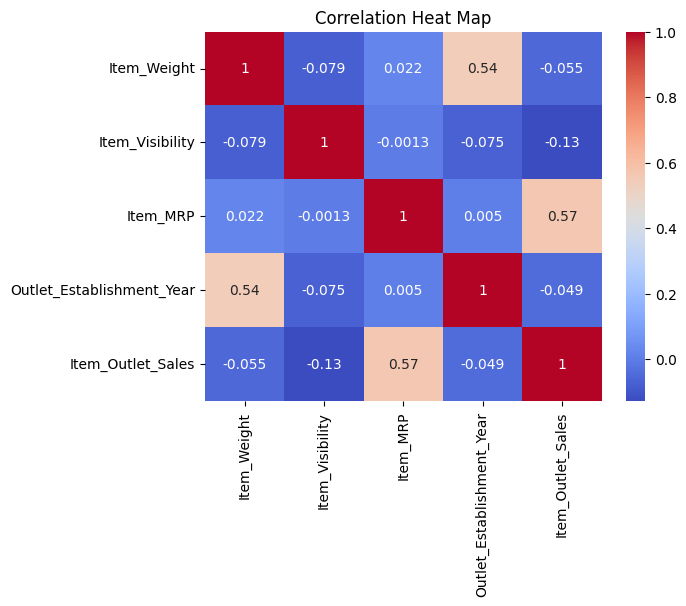

In [48]:
mask = np.triu(np.ones_like(corr)) #code not working
ax3=sns.heatmap(corr,cmap='coolwarm',annot=True)
ax3.set_title('Correlation Heat Map');

## Feature Inspection

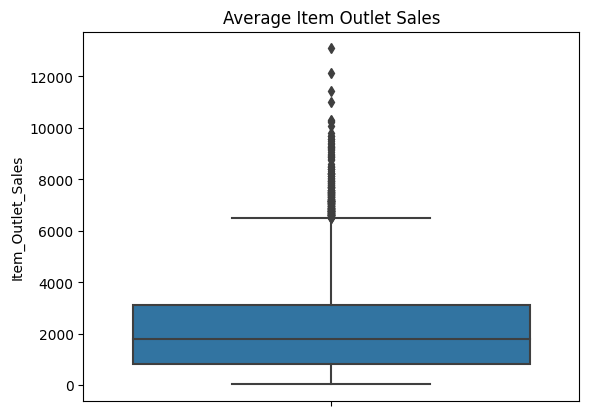

In [55]:
ax1= sns.boxplot(data=df, y='Item_Outlet_Sales')
ax1.set_title('Average Item Outlet Sales');

50% of the stores sell an average between 1500 and 3000.  Sales can reach over 12000, however above ~6000 concider outliers.

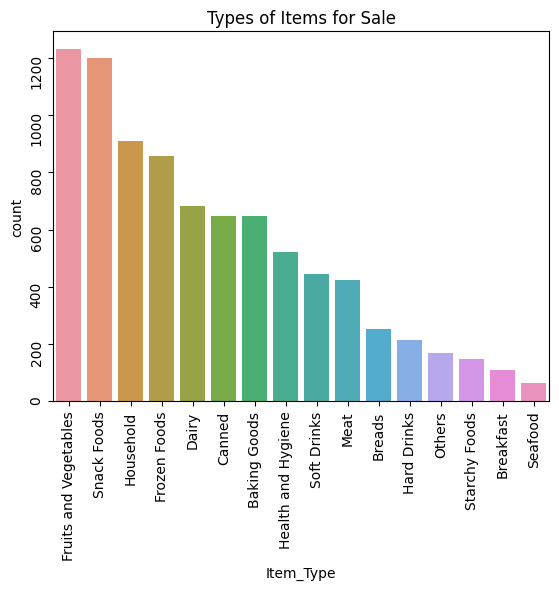

In [59]:
ax2 = sns.countplot(data=df, x= 'Item_Type',order=val_counts.index)
ax2.tick_params(rotation = 90)
ax2.set_title('Types of Items for Sale');

Seafood is the least sold item.  Fruits and Veg is the most solded item along with snack foods, any corrlation here, ie "snack foods"